Fisher Iris Data

Author: Regina Fennessy

----------

In [4]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import requests
from PIL import Image
from IPython.display import display
import io
from matplotlib.colors import ListedColormap
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix






## Iris Flower data set

The Iris flower data set was made famous by Ronald Fisher in 1936. 

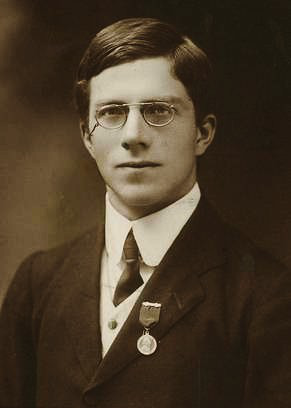

In [5]:
# Url
url = "https://upload.wikimedia.org/wikipedia/commons/a/aa/Youngronaldfisher2.JPG"
response = requests.get(url)

image_data = response.content
image = Image.open(io.BytesIO(image_data))
# Show image
display(image)


It is also know as the Anderson's Iris data set  as Edgar Anderson collected the data to quantify variation on the 3 types of flowers. <br>
This dataset is one of the most used datasets especially as a beginner's dataset for machine learning. <br>
The dataset is made up of 50 samples from 3 different types of the Iris flower species.<br>
It contains five attributes:<br>
Species <br>
Sepal length <br>
Sepal Width <br>
Petal Length <br>
Petal Width <br>

## Supervised Learning

Supervised learning is a subcategory of machine learning. It is also know as supervised machine learning. It is used to train algorithms to classify a dataset. It is used to help solve real world problems. By training this dataset it allows the model to learn over time. <br>
It can be seperated into two types of problems. <br>
Classification : is used to assign test data into categories. Examples are liner classifers, support vector machines,decision trees, random forest and K-nearest neighbour.<br>
Regression: is used to understans the relationship between variables. Examples include linear regression and logistical regression.<br>

K-Nearest Neighbour Accuracy: 1.0


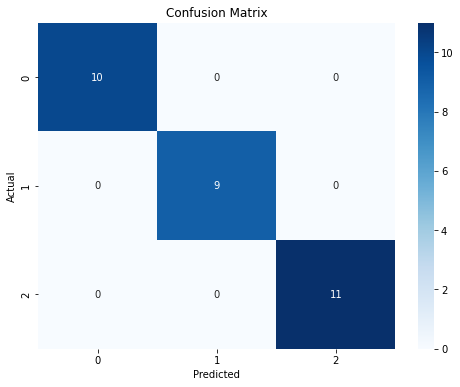

In [6]:

data = load_iris()
X = data.data  # Features
y = data.target  # Target labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Variable value
k = 3  

knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)


y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"K-Nearest Neighbour Accuracy: {accuracy}")


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()




Classification algorithm eg and what it is

-------------------------

## Reference

Dataset : https://en.wikipedia.org/wiki/Iris_flower_data_set
Supervised learning: https://www.ibm.com/topics/supervised-learning